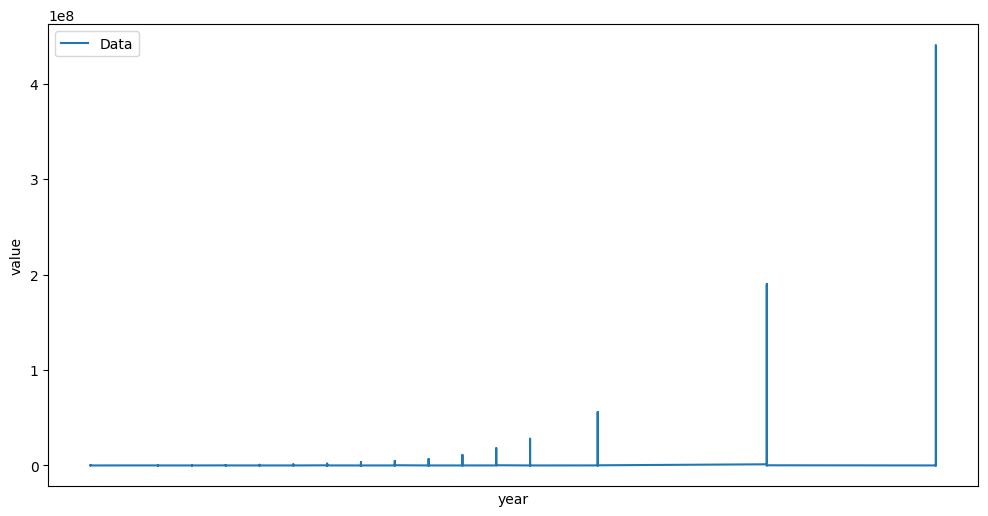

<Figure size 1200x600 with 0 Axes>

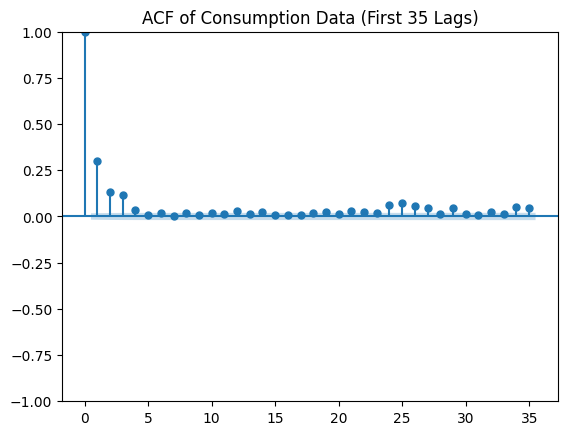

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

Mean Absolute Error: 1861966.80
Root Mean Squared Error: 15307778.30
Variance_testing: 231210909632547.34


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set seed for reproducibility
np.random.seed(0)

# Load and preprocess data
data = pd.read_csv('ev.csv')
data['year'] = pd.to_datetime(data['year'])
data = data.sort_values(by='year')
data.set_index('year', inplace=True)
data.dropna(inplace=True)

# Plot the consumption data
plt.figure(figsize=(12, 6))
plt.plot(data['value'], label='Data')
plt.xlabel('year')
plt.ylabel('value')
plt.legend()
plt.title('')
plt.show()

# Split into train and test data
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]
y_train = train_data['value']
y_test = test_data['value']

# Compute and plot ACF for the first 35 lags
plt.figure(figsize=(12, 6))
plot_acf(data['value'], lags=35)
plt.title('ACF of Consumption Data (First 35 Lags)')
plt.show()
# Fit an autoregressive model (AR)
lag_order = 1  # you can adjust based on the ACF plot
data['value'].corr(data['value'].shift(1))
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error
lag_order = 35
ar_model = AutoReg(y_train, lags=lag_order)
ar_results = ar_model.fit()

# Predictions
y_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Compute MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
variance = np.var(y_test)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Variance_testing: {variance:.2f}')

Mean: 427374.17
Variance: 47062717688482.63


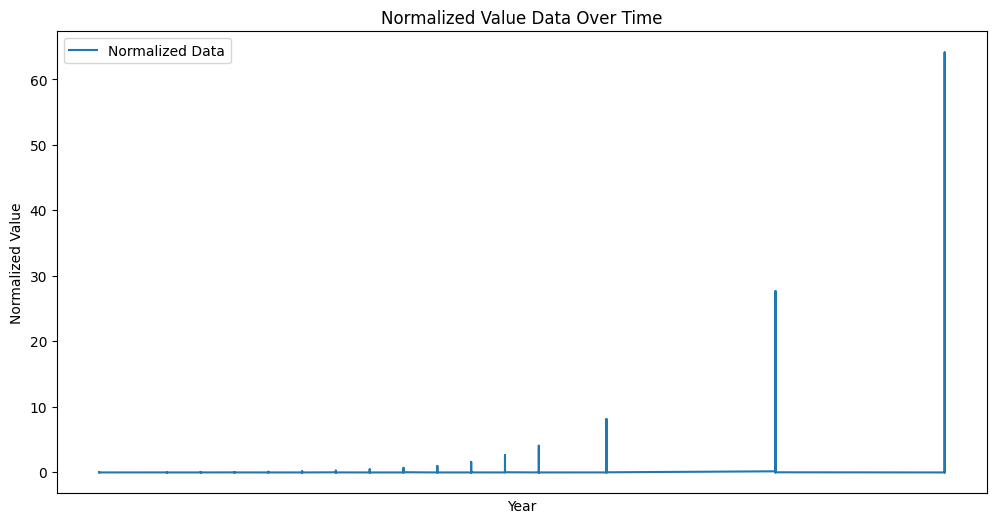

<Figure size 1200x600 with 0 Axes>

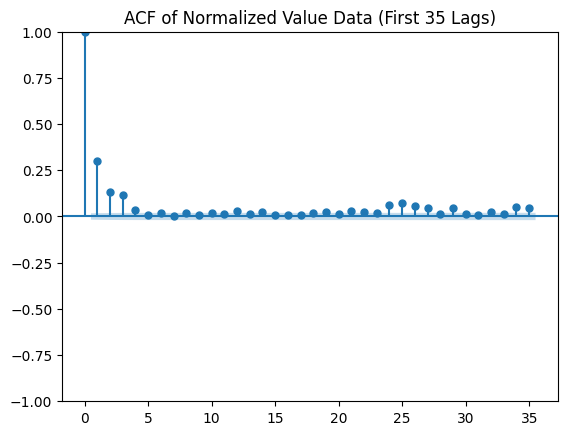

Correlation Results for Lags 1 to 35:
[0.29995251 0.12978249 0.11642257 0.03273641 0.00640638 0.02075845
 0.00288114 0.01793944 0.00572309 0.01856124 0.01560074 0.03062069
 0.01298733 0.02181565 0.01043923 0.00674605 0.00915237 0.01837843
 0.02522852 0.01320779 0.02709915 0.02378051 0.01942683 0.06205596
 0.07423088 0.05602763 0.04523545 0.01367633 0.04683016 0.01278975
 0.00954927 0.02357925 0.01255142 0.04901833 0.04586442]


<ipython-input-2-af7be06c11b5>:63: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(1, 36), correlation_array, basefmt=" ", use_line_collection=True)


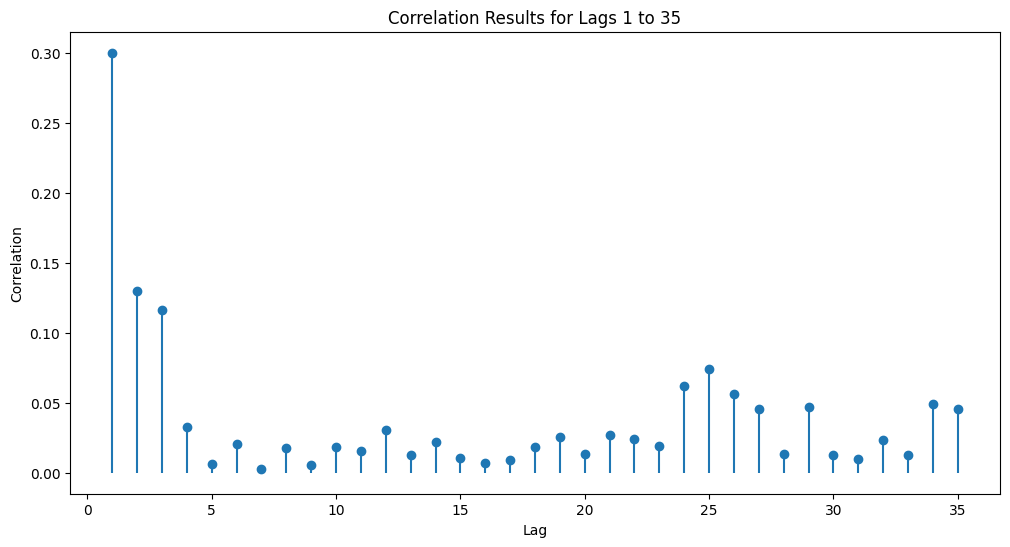

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set seed for reproducibility
np.random.seed(0)

# Load and preprocess data
data = pd.read_csv('ev.csv')
data['year'] = pd.to_datetime(data['year'])
data = data.sort_values(by='year')
data.set_index('year', inplace=True)
data.dropna(inplace=True)

# Calculate mean and variance
mean_value = np.mean(data['value'])
variance_value = np.var(data['value'])

# Normalize the data (z-score normalization)
data['normalized_value'] = (data['value'] - mean_value) / np.sqrt(variance_value)

# Display mean and variance
print(f"Mean: {mean_value:.2f}")
print(f"Variance: {variance_value:.2f}")

# Plot the normalized data
plt.figure(figsize=(12, 6))
plt.plot(data['normalized_value'], label='Normalized Data')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.legend()
plt.title('Normalized Value Data Over Time')
plt.show()

# Split into train and test data
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]
y_train = train_data['normalized_value']
y_test = test_data['normalized_value']

# Compute and plot ACF for the first 35 lags
plt.figure(figsize=(12, 6))
plot_acf(data['normalized_value'], lags=35)
plt.title('ACF of Normalized Value Data (First 35 Lags)')
plt.show()

# Compute the correlation matrix
correlation_matrix = data['normalized_value'].autocorr(lag=1)
correlation_results = [data['normalized_value'].autocorr(lag=lag) for lag in range(1, 36)]

# Store the correlation results in an array
correlation_array = np.array(correlation_results)

# Display the correlation results
print("Correlation Results for Lags 1 to 35:")
print(correlation_array)

# Plot the correlation results
plt.figure(figsize=(12, 6))
plt.stem(range(1, 36), correlation_array, basefmt=" ", use_line_collection=True)
plt.title('Correlation Results for Lags 1 to 35')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()
